In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,f1_score,precision_score,cohen_kappa_score,classification_report,recall_score

In [3]:
from sklearn.model_selection import cross_val_score

In [4]:
import statsmodels.api as sm

In [5]:
data=pd.read_csv('heart.csv')

In [6]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
data['target'].unique()

array([1, 0], dtype=int64)

In [8]:
data.shape

(303, 14)

**CHEST PAIN**
* Typical angina (TA) is defined as substernal chest pain precipitated by physical exertion or emotional stress and relieved with rest or nitroglycerin.
* Atypical pain is frequently defined as epigastric or back pain or pain that is described as burning, stabbing, or characteristic of indigestion. Typical symptoms usually include chest, arm, or jaw pain described as dull, heavy, tight, or crushing.
* non anginal : without any symp silent heart attacks.
* Asymptomatic means there are no symptoms. You are considered asymptomatic if you: Have recovered from an illness or condition and no longer have symptom

**RESTING BP**
* Blood pressure (BP) is the pressure of circulating blood against the walls of blood vessels. Most of this pressure results from the heart pumping blood through the circulatory system. When used without qualification, the term "blood pressure" refers to the pressure in the large arteries.

**CHOLESTROL**
* Cholesterol is a waxy substance. It’s not inherently “bad.” Your body needs it to build cells and make vitamins and other hormones. But too much cholesterol can pose a problem.

**BLOOD SUGAR**
* Blood sugar, or glucose, is the main sugar found in blood. The body gets glucose from the food we eat. This sugar is an important source of energy and provides nutrients to the body's organs, muscles and nervous system. Diabetes happens when the body lacks insulin or because the body is not working effectively

In [9]:
data['ca'].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

In [10]:
data['thal'].value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

# EDA

In [11]:
data.shape

(303, 14)

In [12]:
data[data['ca']==4]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0


In [13]:
data[data['thal']==0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


In [14]:
data1=data.copy()

In [15]:
data.drop(index=[48,92,158,163,164,251,281],inplace=True)

In [16]:
for i in data.columns:
    print(i)
    print(data[i].value_counts())
    print('-----------------------------------------')

age
58    18
57    17
54    16
59    14
51    12
62    11
52    11
60    11
44    11
56    11
41    10
64    10
63     9
67     9
42     8
55     8
45     8
61     8
65     8
66     7
53     7
50     7
48     7
46     7
43     7
49     5
47     5
35     4
70     4
39     4
68     4
40     3
69     3
71     3
37     2
34     2
76     1
74     1
29     1
38     1
77     1
Name: age, dtype: int64
-----------------------------------------
sex
1    201
0     95
Name: sex, dtype: int64
-----------------------------------------
cp
0    141
2     83
1     49
3     23
Name: cp, dtype: int64
-----------------------------------------
trestbps
120    37
130    36
140    32
110    19
150    17
160    11
125    10
128    10
138    10
112     9
132     7
118     7
108     6
135     6
124     6
152     5
145     5
134     5
100     4
122     4
170     4
126     3
115     3
105     3
136     3
180     3
142     3
146     2
148     2
178     2
94      2
144     2
102     2
129     1
192     1
101     1


In [17]:
#cp
#sex
#fbs
#rest ecg
#exang
#slope
#ca
#thal
#target

In [18]:
cat=[i for i in data.columns if(data[i].nunique()<=5)]

In [19]:
cat

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [20]:
num=[i for i in data.columns if(data[i].nunique()>5)]

In [21]:
num

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [22]:
data['target'].value_counts(normalize=True)

1    0.540541
0    0.459459
Name: target, dtype: float64

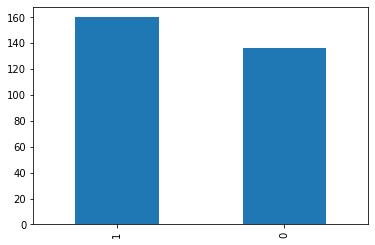

In [23]:
data['target'].value_counts().plot(kind='bar')

In [24]:
#univariate analysis

In [25]:
num

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

C:\Users\sownd\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


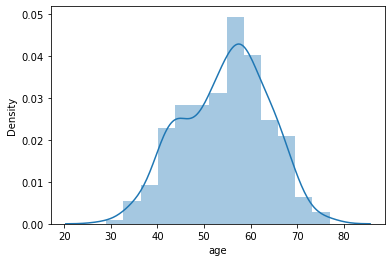

C:\Users\sownd\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


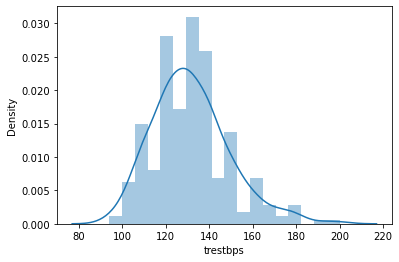

C:\Users\sownd\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


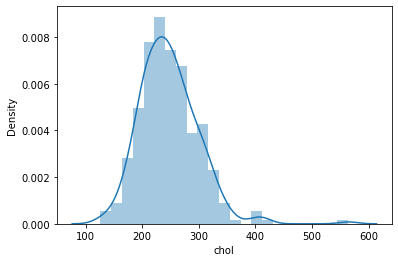

C:\Users\sownd\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


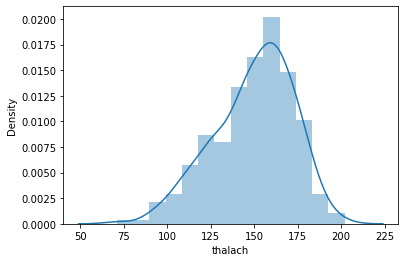

C:\Users\sownd\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


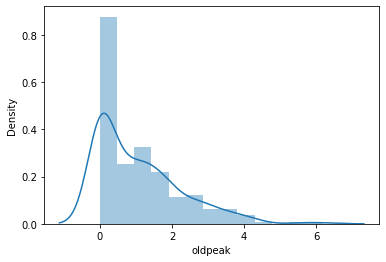

In [26]:
for i in data[num]:
    sns.distplot(data[i])
    plt.show()

sex


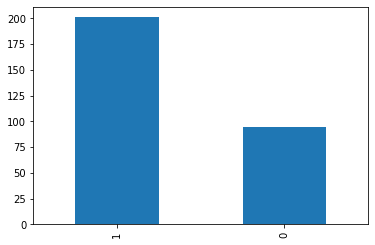

cp


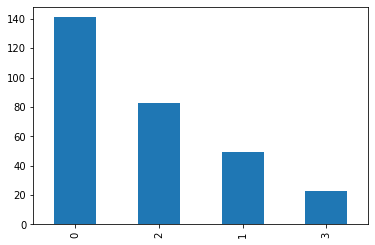

fbs


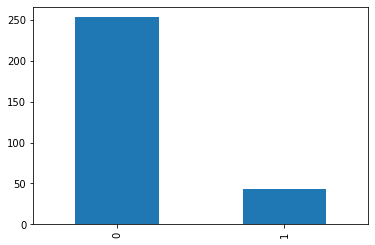

restecg


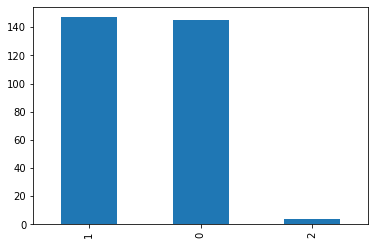

exang


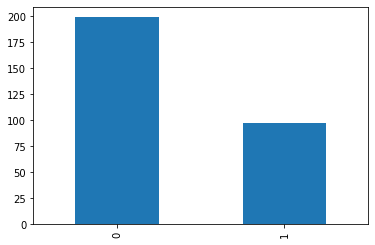

slope


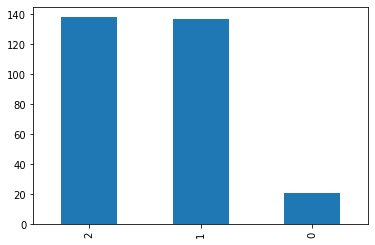

ca


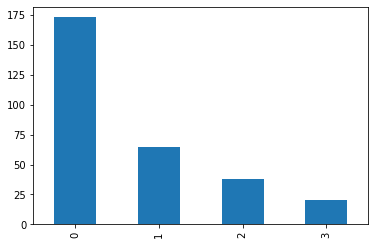

thal


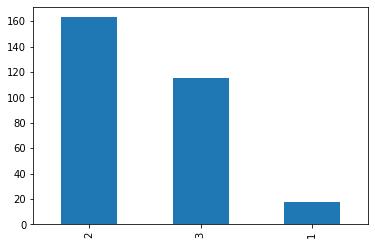

target


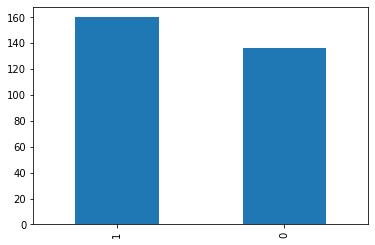

In [27]:
for i in data[cat]:
    print(i)
    data[i].value_counts().plot(kind='bar')
    plt.show()

In [28]:
# sns.pairplot(data)

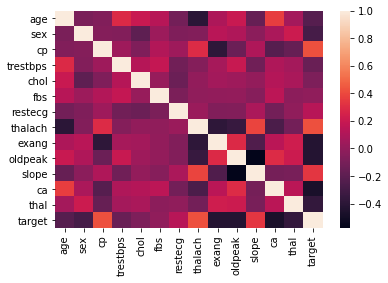

In [29]:
sns.heatmap(data.corr())

C:\Users\sownd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


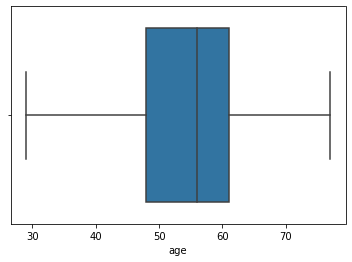

C:\Users\sownd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


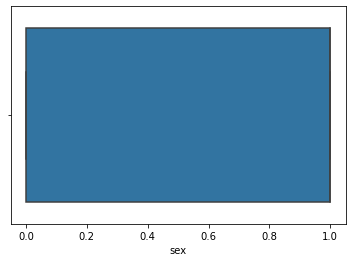

C:\Users\sownd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


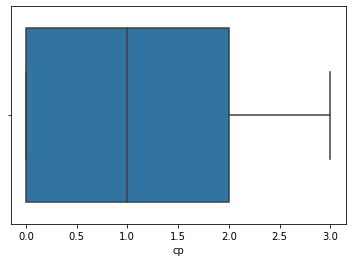

C:\Users\sownd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


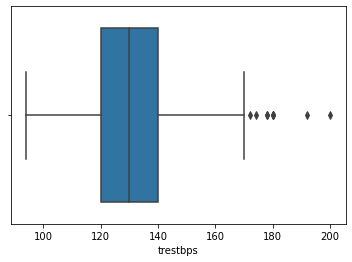

C:\Users\sownd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


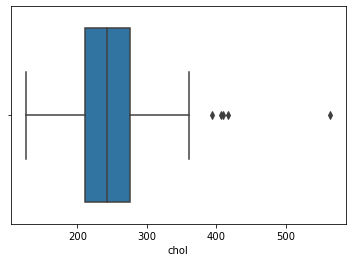

C:\Users\sownd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


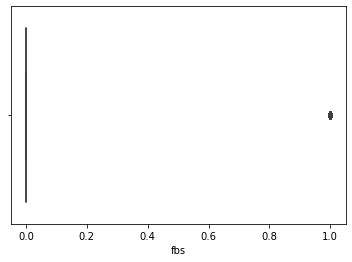

C:\Users\sownd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


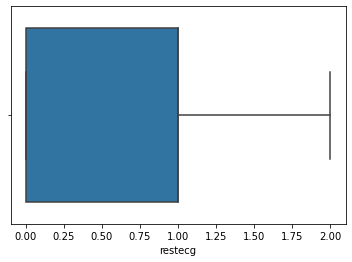

C:\Users\sownd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


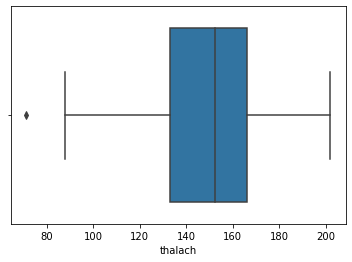

C:\Users\sownd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


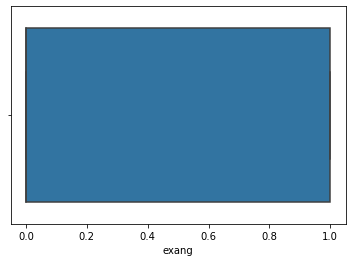

C:\Users\sownd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


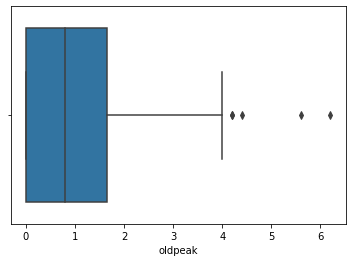

C:\Users\sownd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


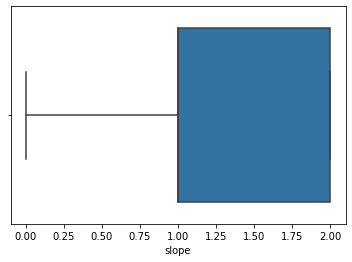

C:\Users\sownd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


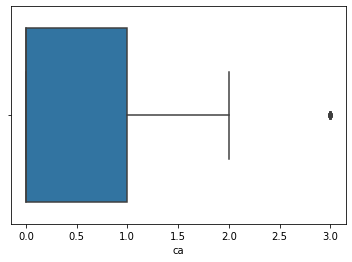

C:\Users\sownd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


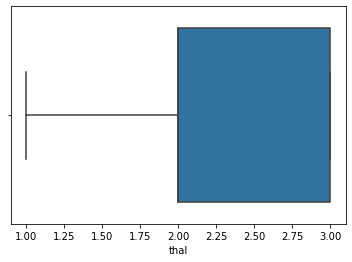

C:\Users\sownd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


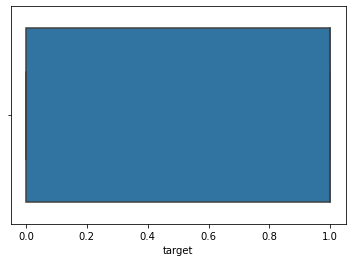

In [30]:
for i in data.columns:
    sns.boxplot(data[i])
    plt.show()

In [31]:
num

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [32]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.089820,-0.061405,0.288701,0.200920,0.133022,-0.112365,-0.395989,0.098051,0.199373,-0.161758,0.364229,0.063373,-0.225453
sex,-0.089820,1.000000,-0.048023,-0.059520,-0.193749,0.036981,-0.072303,-0.058293,0.140791,0.102641,-0.028719,0.088788,0.212017,-0.285322
cp,-0.061405,-0.048023,1.000000,0.044610,-0.067926,0.118337,0.039106,0.296621,-0.383902,-0.142159,0.104675,-0.226203,-0.162660,0.423425
trestbps,0.288701,-0.059520,0.044610,1.000000,0.126705,0.183658,-0.117539,-0.051817,0.070501,0.196793,-0.126742,0.102042,0.063773,-0.148922
chol,0.200920,-0.193749,-0.067926,0.126705,1.000000,0.014286,-0.142039,-0.001947,0.062132,0.042144,0.005572,0.119006,0.082496,-0.076541
fbs,0.133022,0.036981,0.118337,0.183658,0.014286,1.000000,-0.082361,-0.007155,-0.001863,0.007062,-0.046550,0.151259,-0.017891,-0.004680
restecg,-0.112365,-0.072303,0.039106,-0.117539,-0.142039,-0.082361,1.000000,0.030001,-0.065623,-0.055528,0.090915,-0.111317,-0.008723,0.131716
thalach,-0.395989,-0.058293,0.296621,-0.051817,-0.001947,-0.007155,0.030001,1.000000,-0.383671,-0.346742,0.388453,-0.267861,-0.111961,0.426655
exang,0.098051,0.140791,-0.383902,0.070501,0.062132,-0.001863,-0.065623,-0.383671,1.000000,0.287812,-0.248879,0.146783,0.224178,-0.425085
oldpeak,0.199373,0.102641,-0.142159,0.196793,0.042144,0.007062,-0.055528,-0.346742,0.287812,1.000000,-0.577779,0.292905,0.211675,-0.428804


In [33]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,296.000000,296.000000,296.000000,296.00000,296.000000,296.00000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000
mean,54.523649,0.679054,0.959459,131.60473,247.155405,0.14527,0.523649,149.560811,0.327703,1.059122,1.395270,0.679054,2.327703,0.540541
std,9.059471,0.467631,1.034184,17.72662,51.977011,0.35297,0.526692,22.970792,0.470171,1.166474,0.618235,0.939726,0.585743,0.499198
min,29.000000,0.000000,0.000000,94.00000,126.000000,0.00000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,0.000000,120.00000,211.000000,0.00000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.00000,242.500000,0.00000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.00000,275.250000,0.00000,1.000000,166.000000,1.000000,1.650000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.00000,564.000000,1.00000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


In [34]:
# missing value analysis

In [35]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [36]:
# NO MISSING VALUES

In [37]:
#ANALYSIS

In [38]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [39]:
data['target'].value_counts(normalize=True)*100

1    54.054054
0    45.945946
Name: target, dtype: float64

# Age

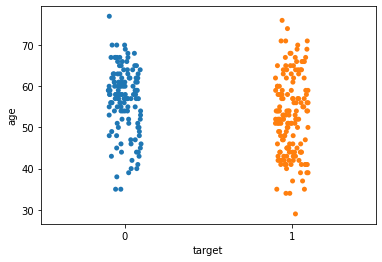

In [40]:
sns.stripplot(x=data['target'],y=data['age'])

In [41]:
print("The minimum age present:",data['age'].min())
print('The mean age present:',data['age'].mean())
print('The maximum age present:',data['age'].max())

The minimum age present: 29
The mean age present: 54.523648648648646
The maximum age present: 77


In [42]:
young=data[(data['age']>=29)&(data['age']<40)]
middle=data[(data['age']>=40)&(data['age']<55)]
old=data[(data['age']>55)]

Text(0, 0.5, 'COUNT')

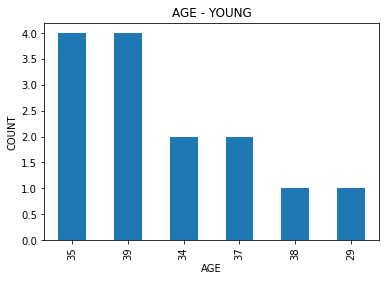

In [43]:
young['age'].value_counts().plot(kind='bar')
plt.title('AGE - YOUNG')
plt.xlabel('AGE')
plt.ylabel('COUNT')

# We can see that young age people are also affected by HD

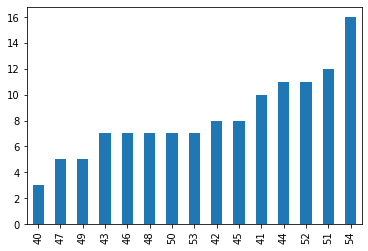

In [44]:
middle['age'].value_counts().sort_values().plot(kind='bar')


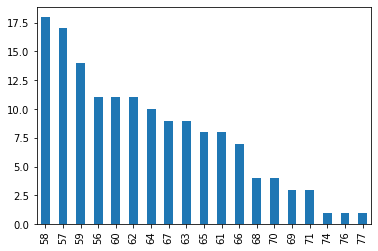

In [45]:
old['age'].value_counts().plot(kind='bar')

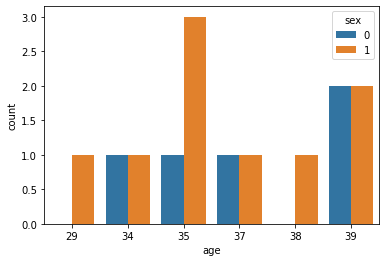

In [46]:
sns.countplot(x=young['age'],hue=young['sex'])

# WRT the above graph male population is high with young age

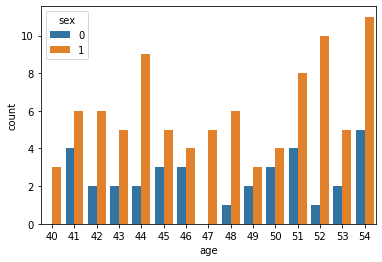

In [47]:
sns.countplot(x=middle['age'],hue=middle['sex'])

# Male(1) are more in number in middle range

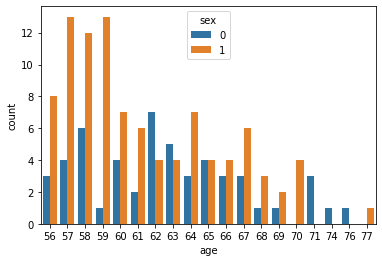

In [48]:
sns.countplot(x=old['age'],hue=old['sex'])

# here also the male count is high

# Age with target

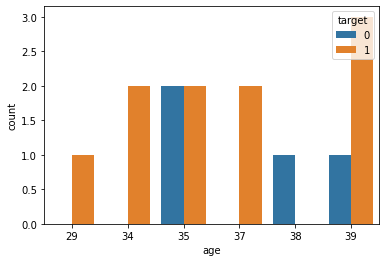

In [49]:
sns.countplot(x=young['age'],hue=young['target'])

# At age 35, we can see a unique inference where it has both the targets at equal level

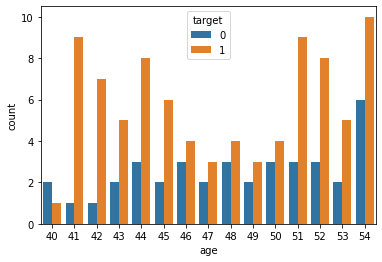

In [50]:
sns.countplot(x=middle['age'],hue=middle['target'])

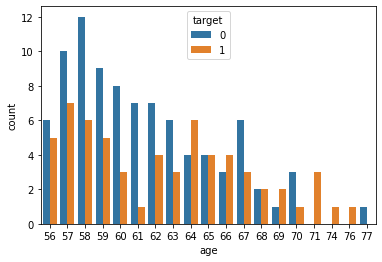

In [51]:
sns.countplot(x=old['age'],hue=old['target'])

In [52]:
# AGE AND CHEST PAIN

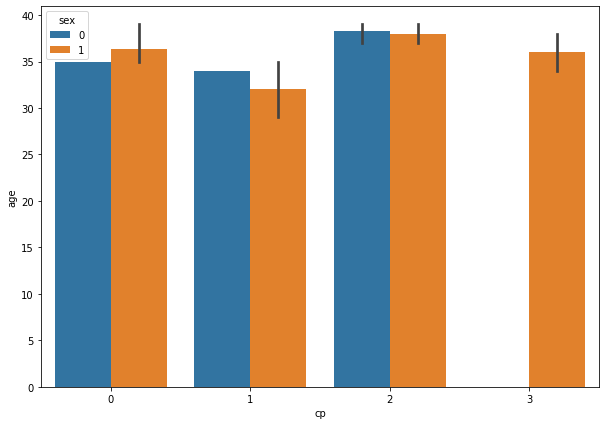

In [53]:
plt.figure(figsize=(10,7))
sns.barplot(x=young['cp'],y=young['age'],hue=young['sex'])

# For cp-2 Atypical angina, we can see that both male and female ages are almose equal

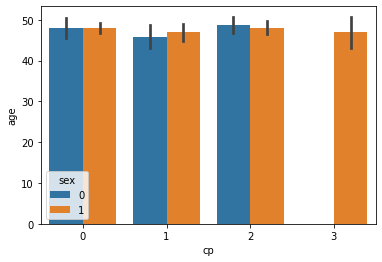

In [54]:
sns.barplot(x=middle['cp'],y=middle['age'],hue=middle['sex'])

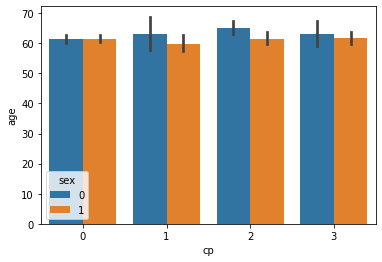

In [55]:
sns.barplot(x=old['cp'],y=old['age'],hue=old['sex'])

In [56]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [57]:
#age and trestbps

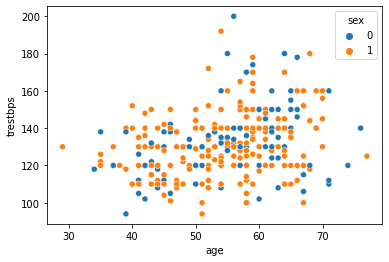

In [58]:
sns.scatterplot(x=data['age'],y=data['trestbps'],hue=data['sex'])

In [59]:
# From the graph we can infer that the corr bet them is moderately positive

In [60]:
# age and cholestrol levels

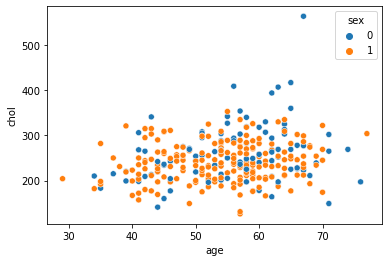

In [61]:
sns.scatterplot(x=data['age'],y=data['chol'],hue=data['sex'])

In [62]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

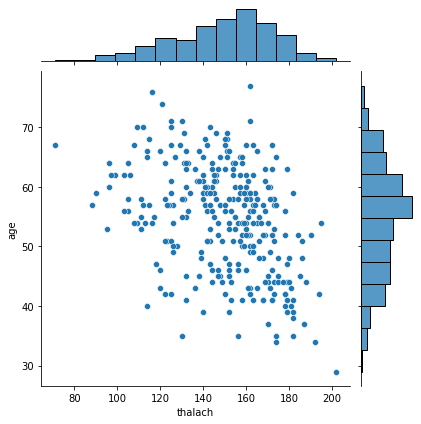

In [63]:
sns.jointplot(x=data['thalach'],y=data['age'])

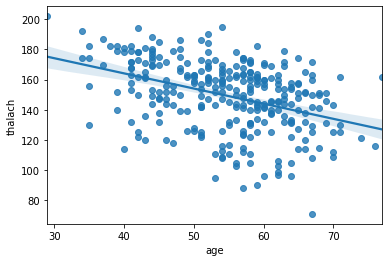

In [64]:
sns.regplot(x=data['age'],y=data['thalach'])

# we can see a negative corr between thalach (max heart rate and age) 

In [65]:
data.corr()['age']['thalach']

-0.3959887036598795

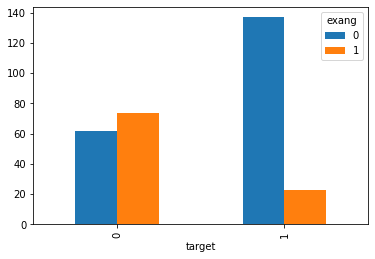

In [66]:
pd.crosstab(data['target'],data['exang']).plot(kind='bar')

# when comp with the target the count is high for those who have heart disease and they also have exang= exercise induced angina

In [67]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

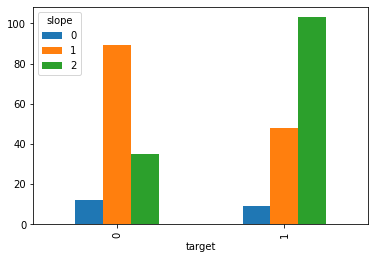

In [68]:
pd.crosstab(data['target'],data['slope']).plot(kind='bar')

# Patients who have Heart Disease have downsloping (ST Depression slope in ECG)

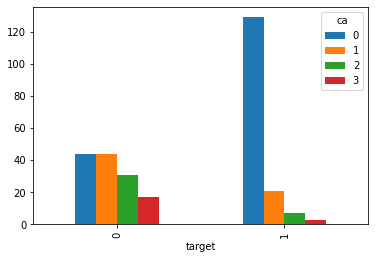

In [69]:
pd.crosstab(data['target'],data['ca']).plot(kind='bar')

# 0  (MAJOR VESSELS) is high wrt to those who have HD

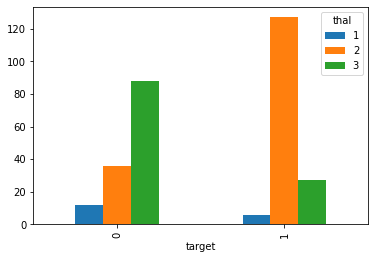

In [70]:
pd.crosstab(data['target'],data['thal']).plot(kind='bar')

# Those who have HD HAVE had Thalessima as shown from the graph

In [71]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

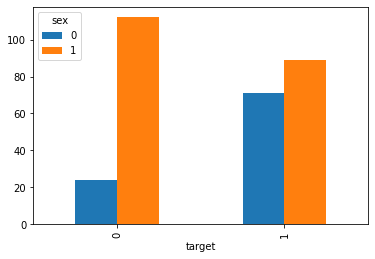

In [72]:
pd.crosstab(data['target'],data['sex']).plot(kind='bar')

# Male have high count compared to female in having HD

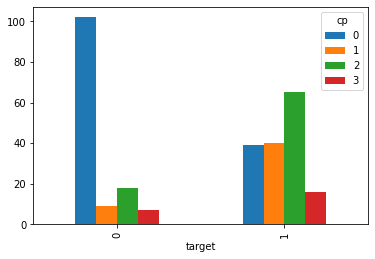

In [73]:
pd.crosstab(data['target'],data['cp']).plot(kind='bar')

# Type 2 count is high for those who have HD

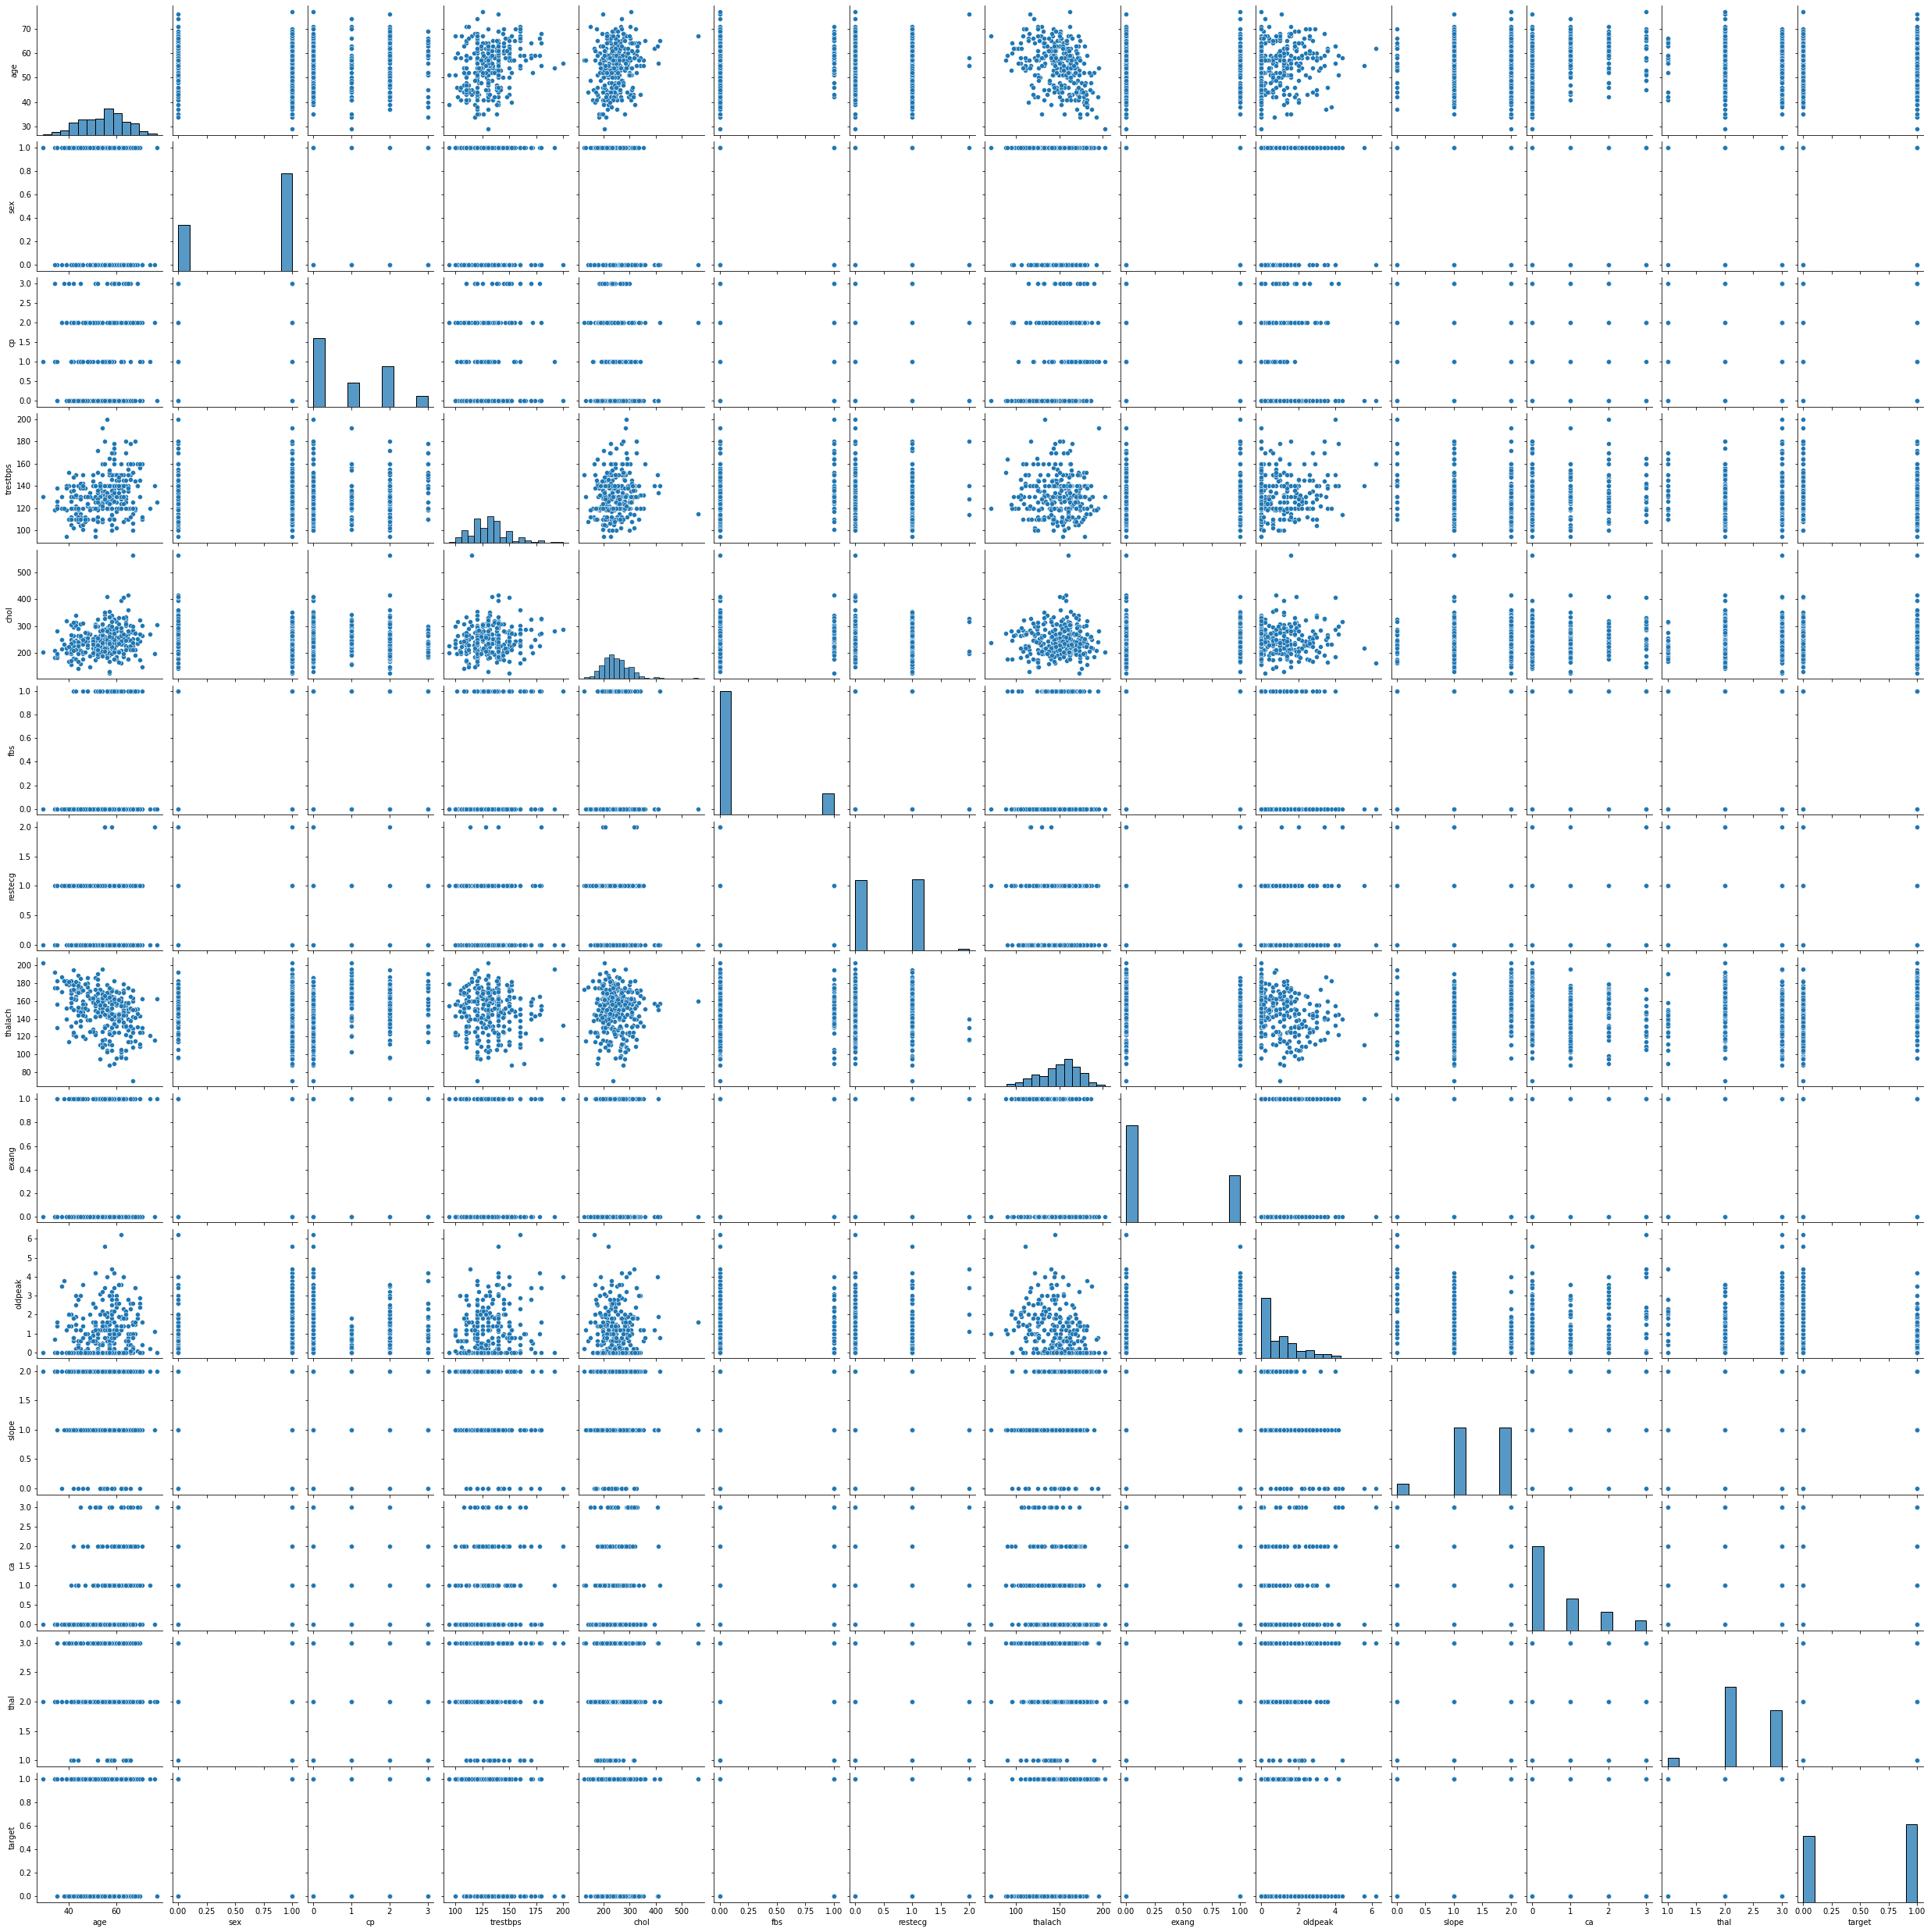

In [74]:
sns.pairplot(data)

# INFERENCES:
* At age 35, we can see a unique inference where it has both the targets at equal level
* For cp-2 Atypical angina, we can see that both male and female ages are almose equal
* we can see a negative corr between thalach (max heart rate and age)
* when comp with the target the count is high for those who have heart disease and they also have exang= exercise induced angina
* Patients who have Heart Disease have downsloping (ST Depression slope in ECG)
* 0  (MAJOR VESSELS) is high wrt to those who have HD
* Those who have HD HAVE had Thalessima as shown from the graph
* Male have high count compared to female in having HD
* Type 2 cp count is high for those who have HD

# MODEL BULIDING

In [75]:
#BASE MODEL

In [76]:
inp=data.drop('target',axis=1)
out=data['target']

In [77]:
xtrain,xtest,ytrain,ytest=train_test_split(inp,out,test_size=0.3,random_state=10)

In [78]:
logr=LogisticRegression(random_state=0,max_iter=1000)
mod1=logr.fit(xtrain,ytrain)
ypred=mod1.predict(xtest)

In [79]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.97      0.77      0.86        43
           1       0.82      0.98      0.89        46

    accuracy                           0.88        89
   macro avg       0.89      0.87      0.87        89
weighted avg       0.89      0.88      0.87        89



In [80]:
log_accuracy_score=accuracy_score(ytest,ypred)
log_precision_score=precision_score(ytest,ypred)
log_f1_score=f1_score(ytest,ypred)

In [81]:
log_recall_score=recall_score(ytest,ypred)

# Accuracy
* Accuracy is the proportion of correct predictions over the total number of predictions.
* Accuracy = (TP + TN) / All Predictions

In [82]:
log_accuracy_score

0.8764044943820225

# Recall
* out of all actual Positives, how many did we predict as Positive
* Recall = TP / (FN + TP)

In [83]:
log_recall_score

0.9782608695652174

# Precision
* out of all predicted Positive cases, how many were actually Positive
* Precision = TP / (TP + FP)

In [84]:
log_precision_score

0.8181818181818182

# F1-Score
* F1 Score is the harmonic, or weighted, an average of Precision and Recall
* F1 Score = 2 * (Precision * Sensitivity) / (Precision + Sensitivity)

In [85]:
log_f1_score

0.8910891089108911

In [86]:
logr1=LogisticRegression(max_iter=1000)
score1=cross_val_score(logr1,inp,out,cv=5,scoring='f1')
avg1=np.mean(score1)
ve1=np.std(score1)
cve1=np.std(score1)/np.mean(score1)
print(avg1,ve1,cve1)

0.8684759924310128 0.02917306309654038 0.03359109906409731


In [87]:
model=pd.DataFrame()
cve_log=cve1

In [88]:
logr1=LogisticRegression(max_iter=1000)
score1=cross_val_score(logr1,inp,out,cv=5,scoring='recall')
avg1=np.mean(score1)
ve1=np.std(score1)
cve1=np.std(score1)/np.mean(score1)
print(avg1,ve1,cve1)

0.9 0.03644344934278313 0.04049272149198126


# Decision Tree

In [89]:
from sklearn.tree import DecisionTreeClassifier

In [90]:
dt=DecisionTreeClassifier(random_state=0)
mod=dt.fit(xtrain,ytrain)
ypred=mod.predict(xtest)

In [91]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.80      0.77      0.79        43
           1       0.79      0.83      0.81        46

    accuracy                           0.80        89
   macro avg       0.80      0.80      0.80        89
weighted avg       0.80      0.80      0.80        89



In [92]:
dt_acc_score=accuracy_score(ytest,ypred)

In [93]:
dt_rec_score=recall_score(ytest,ypred)

In [94]:
dt_prec_score=precision_score(ytest,ypred)

In [95]:
dt_f1_score=f1_score(ytest,ypred)

In [96]:
dt_acc_score,dt_rec_score,dt_prec_score,dt_f1_score

(0.797752808988764, 0.8260869565217391, 0.7916666666666666, 0.8085106382978724)

In [97]:
score=pd.DataFrame()

In [98]:
log_s=[log_accuracy_score,log_recall_score,log_precision_score,log_f1_score]

In [99]:
dt_s=[dt_acc_score,dt_rec_score,dt_prec_score,dt_f1_score]

In [100]:
score['logistic_regression']=log_s

In [101]:
score['decision_tree']=dt_s

In [102]:
score.rename(index={0:'accuracy',1:'recall',2:'precision',3:'f1_score'},inplace=True)

In [103]:
score

,logistic_regression,decision_tree
accuracy,0.876404,0.797753
recall,0.978261,0.826087
precision,0.818182,0.791667
f1_score,0.891089,0.808511


In [104]:
from sklearn.model_selection import GridSearchCV

In [105]:
param={'criterion':['gini','entropy'],"max_depth":[3,5,7,8,9,10,11,15,17],'min_samples_split':list(range(3,26,2)),'min_samples_leaf':list(range(10,31))}

In [106]:
dt1=DecisionTreeClassifier(random_state=0)
mod1=GridSearchCV(estimator=dt1,param_grid=param,cv=5,scoring='f1')
mod1.fit(xtrain,ytrain)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 8, 9, 10, 11, 15, 17],
                         'min_samples_leaf': [10, 11, 12, 13, 14, 15, 16, 17,
                                              18, 19, 20, 21, 22, 23, 24, 25,
                                              26, 27, 28, 29, 30],
                         'min_samples_split': [3, 5, 7, 9, 11, 13, 15, 17, 19,
                                               21, 23, 25]},
             scoring='f1')

In [107]:
mod1.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 11,
 'min_samples_split': 3}

In [108]:
dt2=DecisionTreeClassifier(criterion='gini',max_depth= 3,min_samples_leaf= 16,min_samples_split=3)

In [109]:
mod2=dt2.fit(xtrain,ytrain)
ypred=mod2.predict(xtest)

In [110]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.89      0.72      0.79        43
           1       0.78      0.91      0.84        46

    accuracy                           0.82        89
   macro avg       0.83      0.82      0.82        89
weighted avg       0.83      0.82      0.82        89



In [111]:
dt2_acc_score=accuracy_score(ytest,ypred)
dt2_rec_score=recall_score(ytest,ypred)
dt2_prec_score=precision_score(ytest,ypred)
dt2_f1_score=f1_score(ytest,ypred)

In [112]:
dt2=[dt2_acc_score,dt2_rec_score,dt2_prec_score,dt2_f1_score]

In [113]:
score['dt_tuned']=dt2

In [114]:
score

,logistic_regression,decision_tree,dt_tuned
accuracy,0.876404,0.797753,0.820225
recall,0.978261,0.826087,0.913043
precision,0.818182,0.791667,0.777778
f1_score,0.891089,0.808511,0.840000


In [115]:
dec_tr=DecisionTreeClassifier()
score3=cross_val_score(dec_tr,inp,out,cv=5,scoring='f1')
avg3=np.mean(score3)
ve3=np.std(score3)
cve3=np.std(score3)/np.mean(score3)
print(avg3,ve3,cve3)

0.7589855842232056 0.04966585334196182 0.06543714976193261


In [116]:
cve_dt=cve3

In [117]:
dec_tr=DecisionTreeClassifier()
score3=cross_val_score(dec_tr,inp,out,cv=5,scoring='recall')
avg3=np.mean(score3)
ve3=np.std(score3)
cve3=np.std(score3)/np.mean(score3)
print(avg3,ve3,cve3)

0.74375 0.08926785535678562 0.12002400720240083


# Random Forest

In [118]:
from sklearn.ensemble import RandomForestClassifier

n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,

In [119]:
rf1=RandomForestClassifier(random_state=0)
rf1.fit(xtrain,ytrain)
ypred_rf1=rf1.predict(xtest)

In [120]:
rf1_acc=accuracy_score(ytest,ypred_rf1)
rf1_rec=recall_score(ytest,ypred_rf1)
rf1_prec=precision_score(ytest,ypred_rf1)
rf1_f1=f1_score(ytest,ypred_rf1)

In [121]:
rf1_score=[rf1_acc,rf1_rec,rf1_prec,rf1_f1]

In [122]:
score['RF']=rf1_score

In [123]:
score

,logistic_regression,decision_tree,dt_tuned,RF
accuracy,0.876404,0.797753,0.820225,0.842697
recall,0.978261,0.826087,0.913043,0.913043
precision,0.818182,0.791667,0.777778,0.807692
f1_score,0.891089,0.808511,0.840000,0.857143


In [124]:
param={'n_estimators':[3,5,7,9],'criterion':['gini','entropy'],'max_depth':list(range(5,11)),'min_samples_split':list(range(5,16)),'min_samples_leaf':list(range(10,21))}

In [125]:
rf=RandomForestClassifier(random_state=0)
mod3=GridSearchCV(estimator=rf,param_grid=param,cv=5,scoring='f1')
mod3.fit(xtrain,ytrain)
mod3.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 10,
 'min_samples_split': 5,
 'n_estimators': 9}

In [126]:
rf2=RandomForestClassifier(n_estimators=5,criterion='gini',max_depth=5,min_samples_leaf=13,min_samples_split=5)
rf2.fit(xtrain,ytrain)
ypred=rf2.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.91      0.74      0.82        43
           1       0.80      0.93      0.86        46

    accuracy                           0.84        89
   macro avg       0.86      0.84      0.84        89
weighted avg       0.85      0.84      0.84        89



In [127]:
acc_rft=accuracy_score(ytest,ypred)
rec_rft=recall_score(ytest,ypred)
prec_rft=precision_score(ytest,ypred)
f1_rft=f1_score(ytest,ypred)

In [128]:
rf_tuned=[acc_rft,rec_rft,prec_rft,f1_rft]

In [129]:
score['RF_tuned']=rf_tuned

In [130]:
score

,logistic_regression,decision_tree,dt_tuned,RF,RF_tuned
accuracy,0.876404,0.797753,0.820225,0.842697,0.842697
recall,0.978261,0.826087,0.913043,0.913043,0.934783
precision,0.818182,0.791667,0.777778,0.807692,0.796296
f1_score,0.891089,0.808511,0.840000,0.857143,0.860000


In [131]:
rand_for=RandomForestClassifier()
score2=cross_val_score(rand_for,inp,out,cv=5,scoring='f1')
avg2=np.mean(score2)
ve2=np.std(score2)
cve2=np.std(score2)/np.mean(score2)
print(avg2,ve2,cve2)

0.8375074138424289 0.01904835790140924 0.022744106603207997


In [132]:
cve_rf=cve2

In [133]:
rand_for=RandomForestClassifier()
score2=cross_val_score(rand_for,inp,out,cv=5,scoring='recall')
avg2=np.mean(score2)
ve2=np.std(score2)
cve2=np.std(score2)/np.mean(score2)
print(avg2,ve2,cve2)

0.85 0.03644344934278313 0.04287464628562721


In [134]:
# inf - coef 
# dt - 

In [135]:
model=pd.DataFrame({'Logistic_reg':[cve_log],'Decision_Tree':[cve_dt],'Random_Forest':[cve_dt]})

In [136]:
model.rename(index={0:'cve'})

,Logistic_reg,Decision_Tree,Random_Forest
cve,0.033591,0.065437,0.065437


In [137]:
score

,logistic_regression,decision_tree,dt_tuned,RF,RF_tuned
accuracy,0.876404,0.797753,0.820225,0.842697,0.842697
recall,0.978261,0.826087,0.913043,0.913043,0.934783
precision,0.818182,0.791667,0.777778,0.807692,0.796296
f1_score,0.891089,0.808511,0.840000,0.857143,0.860000


# Comparing the above results we go for logistic regression as our final model